Training script for kernel-Renyi divergence.

$ \mathcal{L}_{R2} = R_{2}(\Sigma_{p_\theta} || \,\Sigma_\pi) = \text{log}\left(\text{Tr}\left( \Sigma_{p_\theta}^2 \, \Sigma_\pi^{-1}  \right)  \right), $

where 

$\Sigma_p = \sum_{x \in \mathcal{X}} \phi(x) \phi(x)^* p(x) $ 

is the kernel covariance embedding with feature map

$ \phi(x) = \phi_\eta(x) = \text{diag}(\eta)^{\frac{1}{2}} \begin{pmatrix} x \\ 1 \end{pmatrix} .$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import IQP
from qiskit.circuit import ParameterVector

import pennylane as qml

from src import QCIBM_utilities as ut

In [2]:
nq = 4
#alpha_init = np.array([[1,0],[0.1,0.3]])
#Gamma_init = np.array([1,1])
#Delta_init = np.array([0.5, 0.2])
#Sigma_init = np.array([0,0.1])
#theta_init = ut.compose_params(alpha_init, Gamma_init, Delta_init, Sigma_init)

rng = np.random.default_rng(27031995)

theta_init = np.array((np.pi) * rng.random(int(nq*(nq+3)/2)))
theta = ParameterVector('θ', int(nq*(nq+3)/2))

In [3]:
# Sample hyperparams
p_pi = 0.6
n_train = 500
sampleshots = 500

In [4]:
kernel_params = np.ones(nq+1)*(1/(nq+1)) # eta (uniform)

In [5]:
backend = Aer.get_backend('qasm_simulator')

In [6]:
alpha, Gamma, Delta, Sigma = ut.decompose_params(theta, nq)
qc = ut.QCIBM(alpha, Gamma, Delta, Sigma, nq)
qc = transpile(qc, backend)

In [7]:
# Samples modes
T = 3
ps = 0.4
pi_modes = np.zeros((T,nq)) 
for t in range(T):
    for i in range(nq):
        pi_modes[t,i] = rng.binomial(1, ps)
print('modes = ', pi_modes)

modes =  [[0. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
ysamples, pi_vec = ut.sample_target_pdf(n_train, pi_modes, p_pi)
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_init}))

In [9]:
def L_wrapper(theta_, xsamples):
    L = ut.R2_Hypercube_Loss(xsamples, ysamples, kernel_params)
    return(L)

def grad_wrapper(theta_, xsamples, ysamples):
    nablaL = ut.R2_Hypercube_grad(qc, theta, theta_, xsamples, ysamples, backend, kernel_params)
    return(nablaL)

In [10]:
alpha_ = 0.007 #stepsize
theta_opt, R2_history, TV_history = ut.adam(L_wrapper, grad_wrapper, theta, theta_init, backend, qc, sampleshots, ysamples, batch_size = 250, p_target = pi_vec, tol = -1, maxiter = 400, alpha = alpha_)
print('θ_opt = ', theta_opt)
print('min Loss = ', R2_history[-1])


 -- Adam Optimization -- Step t =  1
 - Current Loss =  0.094014783121264
 -- Adam Optimization -- Step t =  2
 - Current Loss =  0.12345930263697634
 -- Adam Optimization -- Step t =  3
 - Current Loss =  0.10493451659196874
 -- Adam Optimization -- Step t =  4
 - Current Loss =  0.06535014504944099
 -- Adam Optimization -- Step t =  5
 - Current Loss =  0.06835774833207185
 -- Adam Optimization -- Step t =  6
 - Current Loss =  0.0704774852451769
 -- Adam Optimization -- Step t =  7
 - Current Loss =  0.0663411273234459
 -- Adam Optimization -- Step t =  8
 - Current Loss =  0.05461017353119351
 -- Adam Optimization -- Step t =  9
 - Current Loss =  0.05575781584860881
 -- Adam Optimization -- Step t =  10
 - Current Loss =  0.049261314324500205
 -- Adam Optimization -- Step t =  11
 - Current Loss =  0.04974550073184
 -- Adam Optimization -- Step t =  12
 - Current Loss =  0.05092735953605913
 -- Adam Optimization -- Step t =  13
 - Current Loss =  0.05348680250490975
 -- Adam Optim

 -- Adam Optimization -- Step t =  107
 - Current Loss =  0.008182015873879405
 -- Adam Optimization -- Step t =  108
 - Current Loss =  0.007904632810080707
 -- Adam Optimization -- Step t =  109
 - Current Loss =  0.008546082759768744
 -- Adam Optimization -- Step t =  110
 - Current Loss =  0.008157387527111966
 -- Adam Optimization -- Step t =  111
 - Current Loss =  0.008564893718126073
 -- Adam Optimization -- Step t =  112
 - Current Loss =  0.008565006279320695
 -- Adam Optimization -- Step t =  113
 - Current Loss =  0.007553091527515432
 -- Adam Optimization -- Step t =  114
 - Current Loss =  0.007971945750959948
 -- Adam Optimization -- Step t =  115
 - Current Loss =  0.00847691388790449
 -- Adam Optimization -- Step t =  116
 - Current Loss =  0.008753081471221094
 -- Adam Optimization -- Step t =  117
 - Current Loss =  0.008753462452807703
 -- Adam Optimization -- Step t =  118
 - Current Loss =  0.008645050962744616
 -- Adam Optimization -- Step t =  119
 - Current Los

 -- Adam Optimization -- Step t =  211
 - Current Loss =  0.0008955291766031077
 -- Adam Optimization -- Step t =  212
 - Current Loss =  0.0006067996356252177
 -- Adam Optimization -- Step t =  213
 - Current Loss =  0.0006744989946647239
 -- Adam Optimization -- Step t =  214
 - Current Loss =  0.0007456875406998273
 -- Adam Optimization -- Step t =  215
 - Current Loss =  0.0006624620791333731
 -- Adam Optimization -- Step t =  216
 - Current Loss =  0.0005935431043220702
 -- Adam Optimization -- Step t =  217
 - Current Loss =  0.0005043878502161905
 -- Adam Optimization -- Step t =  218
 - Current Loss =  0.0005786480163996638
 -- Adam Optimization -- Step t =  219
 - Current Loss =  0.0007690498101153283
 -- Adam Optimization -- Step t =  220
 - Current Loss =  0.000544234500614257
 -- Adam Optimization -- Step t =  221
 - Current Loss =  0.0005042165621389901
 -- Adam Optimization -- Step t =  222
 - Current Loss =  0.0007259518234194049
 -- Adam Optimization -- Step t =  223
 -

 -- Adam Optimization -- Step t =  314
 - Current Loss =  0.00026187411871634084
 -- Adam Optimization -- Step t =  315
 - Current Loss =  0.0003091011039956302
 -- Adam Optimization -- Step t =  316
 - Current Loss =  0.0003091011039956302
 -- Adam Optimization -- Step t =  317
 - Current Loss =  0.00028356117950749626
 -- Adam Optimization -- Step t =  318
 - Current Loss =  0.00035536734039278534
 -- Adam Optimization -- Step t =  319
 - Current Loss =  0.00022492956986321075
 -- Adam Optimization -- Step t =  320
 - Current Loss =  9.199241854587829e-05
 -- Adam Optimization -- Step t =  321
 - Current Loss =  9.042732858949487e-05
 -- Adam Optimization -- Step t =  322
 - Current Loss =  0.00016898845492160664
 -- Adam Optimization -- Step t =  323
 - Current Loss =  0.0002883920411142148
 -- Adam Optimization -- Step t =  324
 - Current Loss =  0.00019965887480527622
 -- Adam Optimization -- Step t =  325
 - Current Loss =  0.000282750904938014
 -- Adam Optimization -- Step t =  

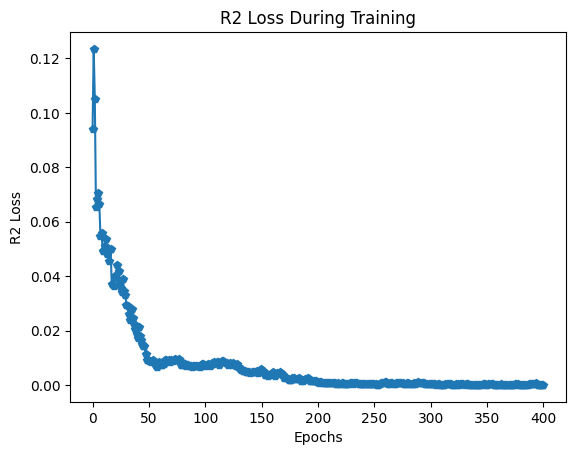

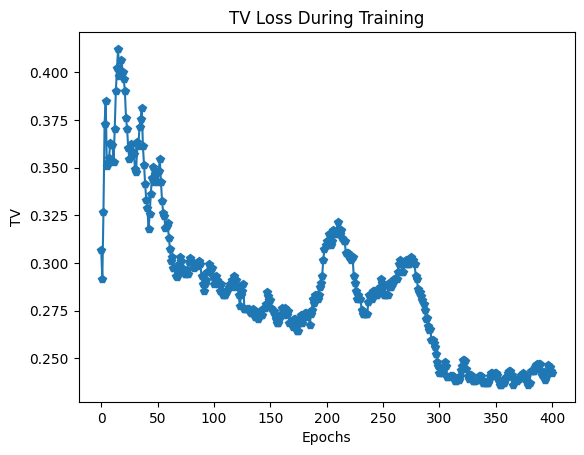

In [11]:
plt.plot(range(len(R2_history)),R2_history, marker='p')
plt.title("R2 Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("R2 Loss")
plt.show()

plt.plot(range(len(TV_history)),TV_history, marker='p')
plt.title("TV Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("TV")
plt.show()

In [12]:
xsamples, phat = ut.sample_circuit( backend, sampleshots, qc.bind_parameters({theta: theta_opt}))

print('Original samples probs, π = ', pi_vec)
print('Optimized probabilitites, p(θ)= ', phat)

Original samples probs, π =  [0.0912     0.0848     0.0608     0.05653333 0.0768     0.0672
 0.0512     0.0448     0.0768     0.0672     0.0512     0.0448
 0.0752     0.0608     0.05013333 0.04053333]
Optimized probabilitites, p(θ)=  [0.09  0.096 0.004 0.13  0.124 0.02  0.05  0.01  0.074 0.068 0.068 0.014
 0.008 0.134 0.056 0.054]


['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


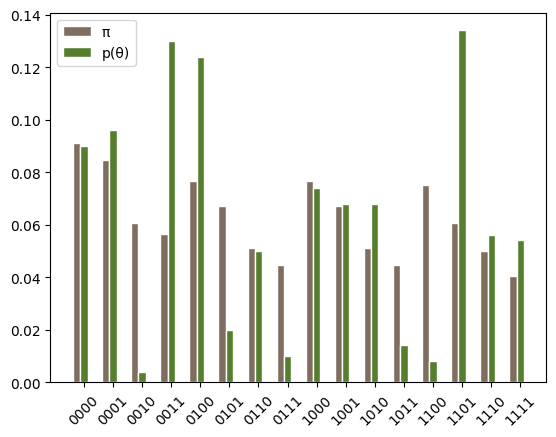

In [13]:
xlabels = []
for j in range(2**nq):
    xlabels.append(ut.binstr_from_int(j,nq))

print(xlabels)

barWidth = 0.25
 
r1 = np.arange(len(pi_vec))
r2 = [x + barWidth for x in r1]
plt.bar(r1, pi_vec, color='#7f6d5f', width=barWidth, edgecolor='white', label='π')
plt.bar(r2, phat, color='#557f2d', width=barWidth, edgecolor='white', label='p(θ)')
plt.xticks([r + barWidth for r in range(len(pi_vec))], xlabels, rotation=45)
plt.legend()
plt.show()

In [14]:
#path = '/home/alb/Scrivania/Quantum/Projects/BornMachine/data/'
#np.savetxt(path+'R2HypercubeTraining4qb400italpha010_theta_opt.csv', theta_opt, delimiter=',')
#np.savetxt(path+'R2HypercubeTraining4qb400italpha010_KL_history.csv', R2_history, delimiter=',')
#np.savetxt(path+'R2HypercubeTraining4qb400italpha010_TV_history.csv', TV_history, delimiter=',')